## 1. Load Package
    패키지를 불러오는 부분입니다.
    이 부분은 드라이브 마운트가 필요한 부분입니다. 이것을 통해서 드라이브로 X_train, test, val, y_train, test, val 을 numpy array로 저장해줍니다.
    그리고 다른 코드들에선 그 파일을 다운받아서 사용할 수 있도록 코딩했습니다.
    그렇게 함으로서 여러명이 코딩할 수 있고, 로컬에서도 실행할 수 있도록 했습니다.

    이 파일 이외의 파일은 별 다른 불편함 없이 실행하면 모두 깔끔하게 실행됩니다.
    이 파일의 경우, 적절한 drive folder를 마운트 해주세요

In [ ]:
import os 
!pip install wfdb

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import wfdb 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Labeling
    Non-specific repolarization abnormalities가 있으면 1 없으면 0으로 다시 라벨링했습니다.

In [ ]:
from tqdm import tqdm_notebook
X = []; y = []
for i in tqdm_notebook(range(1, 201)):
#     print(wfdb.rdrecord(f'dataset/{i}').p_signal)
#     print(wfdb.rdrecord(f"dataset/{i}").comments)
    for_x, for_y = wfdb.rdrecord(f'/content/drive/My Drive/deep_learning/dataset/{i}').p_signal, wfdb.rdrecord(f"/content/drive/My Drive/deep_learning/dataset/{i}").comments
    for t in for_y:
        if "Non-specific repolarization abnormalities" in t:
            for_y = 1
        else:
            for_y = 0
    X.append(for_x)
    y.append(for_y)
X = np.array(X, dtype = np.float32)
y = np.array(y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


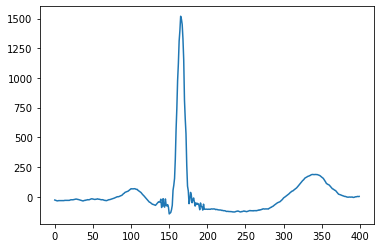

In [34]:
import matplotlib.pyplot as plt
plt.plot(X[0].T[0][500:900])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state = 13)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.15, random_state = 13)

In [40]:
import numpy as np
np.bincount(y_train),np.bincount(y_test),np.bincount(y_val)

(array([116,  37]), array([14,  6]), array([21,  6]))

In [41]:
np.save( '/content/drive/MyDrive/deep_learning/FINASL/final_code/y_train',y_train)
np.save( '/content/drive/MyDrive/deep_learning/FINASL/final_code/y_test',y_test)
np.save( '/content/drive/MyDrive/deep_learning/FINASL/final_code/y_val',y_val)

np.save( '/content/drive/MyDrive/deep_learning/FINASL/final_code/X_train',X_train)
np.save( '/content/drive/MyDrive/deep_learning/FINASL/final_code/X_test',X_test)
np.save( '/content/drive/MyDrive/deep_learning/FINASL/final_code/X_val',X_val)